The main issue here is you actually need, I think these $\alpha_{1}\psi$ and $\alpha_{2}\psi$ terms in order to make sure that everything stays on the dayside


In [1]:
import tsyganenko as tsyg
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from spacepy import coordinates as coord
import spacepy.time as spt
from spacepy.time import Ticktock
import datetime as dt
from mpl_toolkits.mplot3d import Axes3D
import sys
Re = 6371
earth_radius_ax = 1.5*Re #km
#adding the year data here so I don't have to crush my github repo
#pathname = '../../data-se3-path-planner/yearData/batch2019/'
pathname = '../../data-se3-path-planner/yearData/year2019/'
# pathname = '../../batch2019/'
sys.path.append(pathname)

[ 5626.61272022  5700.11917286  5771.42331128 ...,  2667.45773907
  3087.27122709  3295.08163996]


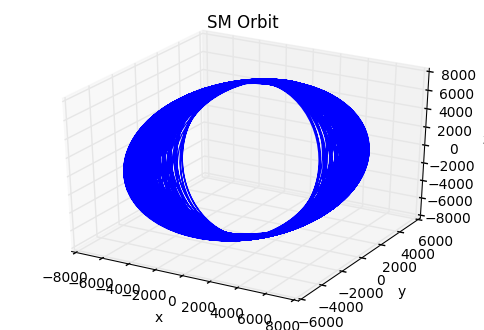

In [2]:
df = pd.read_csv(pathname + 'Jan65_results.csv')
GMAT_MJD_OFFSET = 29999.5
t = df['DefaultSC.A1ModJulian'] + GMAT_MJD_OFFSET
x = df['DefaultSC.gse.X']
y = df['DefaultSC.gse.Y']
z = df['DefaultSC.gse.Z']

#
xa = np.array(x)
ya = np.array(y)
za = np.array(z)
print(za)
ta = np.array(t)

c_system = 'SM'
spacecraft = coord.Coords([[i,j,k] for i,j,k in zip(x,y,z)], 'GSE', 'car')
spacecraft.ticks = Ticktock(t,'MJD')
spacecraft = spacecraft.convert('SM','car')
points = 10000
# this figure validates what I already expected
fig = plt.figure()
ax = fig.add_subplot(111,projection='3d')
ax.plot(spacecraft.x[:points],spacecraft.y[:points],spacecraft.z[:points])
plt.title('SM Orbit')
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('z')
plt.show()

In [3]:
# adding this important term to generate the -30, -15, 0, +15, +30 plots
# psi = tsyg.getTilt(t)
r = np.linspace(0,10)
psi = np.deg2rad(-30)
psi = np.array(psi)
print(psi)
phi_0 = 0.24
alpha1 = 0.1287
alpha2 = 0.0314
phi_0 = 0.24
phi_1 = phi_0 - (alpha1*psi + alpha2*psi**2)

-0.5235987755982988


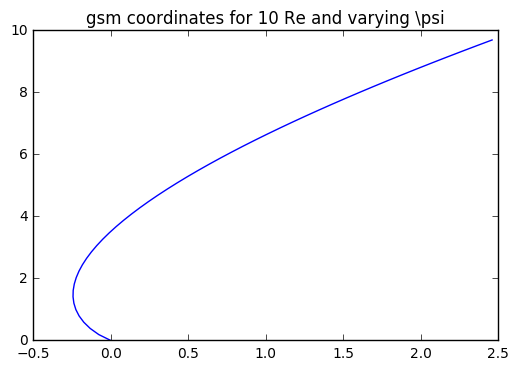

In [4]:
# getting phi_c

phi_c  = np.arcsin( (np.sqrt(r))/(np.sqrt(r + (1/np.sin(phi_1))**2 -1)  )) + psi
# convert to degrees here if desired

zgsm = r*np.cos(phi_c)
xgsm = r*np.sin(phi_c)
plt.plot(xgsm, zgsm)
plt.title('gsm coordinates for 10 Re and varying \psi')
plt.show()

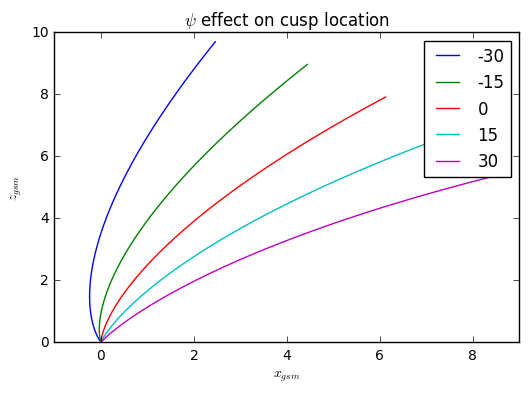

In [5]:
#let's get all the plots below

psiVector_d = np.array([-30, -15, 0, 15, 30])
psiVector_r = np.deg2rad(psiVector_d)

for psi, psi_d in zip(psiVector_r, psiVector_d):
    phi_1 = phi_0 - (alpha1*psi + alpha2*psi**2)
    phi_c  = np.arcsin( (np.sqrt(r))/(np.sqrt(r + (1/np.sin(phi_1))**2 -1)  )) + psi
    # convert to degrees here if desired

    zgsm = r*np.cos(phi_c)
    xgsm = r*np.sin(phi_c)
    plt.plot(xgsm, zgsm, label='%s'%(str(psi_d)))
    
plt.legend()
plt.title('$\psi$ effect on cusp location')
plt.xlabel('$x_{gsm}$')
plt.ylabel('$z_{gsm}$')
plt.show()
    

The night side is the left half plane.  The dayside is the right half plane.  Essentially what this plot is showing is the "thick lines" from the tsyganenko paper.